### ***Radiology Imaging Appointment No-Show Prediction***
##### Exploratory Data Analysis + Statistical Testing + Predictive Modelling  
##### Author: Prashasti Hajela

### **Project Overview**: Healthcare No-Show Prediction: EDA + Feature Engineering + Predictive Modelling  

Missed/ No-show appointments create serious operational and financial challenges for healthcare systems.
Hospitals lose revenue, staff time is wasted, and patients experience delayed care. In Radiology/ Imaging departments, a single no-show can disrupt the entire day's schedule and waste high-value scanner time.

This project explores the Kaggle “No-Show Appointments” dataset and enhances it with synthetic features relevant to real clinical workflows.
The goal is to understand which patient patterns contribute to no-shows and how healthcare organizations can proactively intervene.

This analysis forms the foundation for a predictive model that will later be integrated into a Power Apps scheduling solution to alert staff when a patient is high-risk while scheduling.



### **Dataset** **Overview**
Original Kaggle Dataset Includes:

- PatientID
- AppointmentID
- Gender
- ScheduledDay
- AppointmentDay
- Age
- Neighbourhood
- Scholarship
- Hypertension
- Diabetes
- Alcoholism
- Handicap
- SMS_received
- No-show

Dataset source (Kaggle): https://www.kaggle.com/datasets/joniarroba/noshowappointments

####**Synthetic Features**: To bring this dataset closer to a real clinical scheduling environment, the following synthetic fields were added:

- AgeGroup: Grouped age for better visualization
- Medical_Transport: Whether patient relies on NMET services.
- Visit_Number: patient Number of visit
- Appointment_Day: Extracted day of the week
- WaitingDays: Days between scheduling and appointment

These enriched features make the dataset more relevant for machine-learning and operational analysis in imaging scheduling.

### **Goal of the Project**
This analysis aims to answer:

1. Which patient agegroups have higher no-show rates?
2. Does relying on medical transport increase missed appointments?
3. How does waiting time between scheduling and appointment (WaitingDays) affect attendance?
4. For first-time visitors (First_Visit), do they attend or miss appointments more often?
5. Does the Appointment_Day influence no-show behavior?
6. Which features should be included in a predictive ML model?

### ***Import Libraries***

In [1]:
import pandas as pd                                   # Pandas handles data loading, cleaning, transformation, and analysis.

In [2]:
import numpy as np                                   #library used for numerical calculations

In [3]:
import random                                      # Python’s built-in random number generator, lets you create random values

In [4]:
import matplotlib.pyplot as plt                    # plt allows us to create all the visual graphs needed for EDA and model interpretation.

In [5]:
import seaborn as sns                               ## Seaborn is a visualization library built on top of Matplotlib. provides easy-to-use functions for statistical plots.

sns.set_theme(style='darkgrid', palette='Set2')     # default styling for all plots

In [6]:
from scipy.stats import chi2_contingency

In [7]:
# Sklearn for Preprocessing and Modeling
from sklearn.model_selection import train_test_split                        #Divides the data into training and testing sets for unbiased model evaluation.
from sklearn.linear_model import LogisticRegression                         # Baseline classification model; useful for interpretability.
from sklearn.ensemble import RandomForestClassifier                         # Ensemble tree model that captures nonlinear patterns and handles imbalance better.
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, classification_report,accuracy_score, precision_recall_curve

# High-Performance Model
import xgboost as xgb
from xgboost import XGBClassifier                                 # Gradient boosting classifier; often achieves best performance on structured data.

In [8]:
from imblearn.over_sampling import SMOTE          #SMOTE - Synthetic Minority Oversampling Technique. fixes imbalanced datasets.

### ***Load Dataset***

In [10]:
df = pd.read_csv('/Users/prashastihajela/Downloads/KaggleV2-May-2016.csv')#Load the original Kaggle dataset. 
                                                    # Dataset link: https://www.kaggle.com/datasets/joniarroba/noshowappointments

In [11]:
df.head()         #displays the first 5 rows (default) of dataframe

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### ***Data Cleaning***

In [12]:
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}) ## Renaming column

In [13]:
print("Shape of dataset:", df.shape) # Check overall shape of the dataset

Shape of dataset: (110527, 14)


In [14]:
print("Missing values in each column:")  # Check for missing values in dataset
print(df.isnull().sum())

Missing values in each column:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64


In [15]:
print("Total duplicate rows:", df.duplicated().sum())       # Check for duplicate records

Total duplicate rows: 0


In [16]:
df[df['Age']>100].head()        #display rows where Age >100

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No


#### Age Outlier Handling

- The dataset includes 5 records where Age > 100.
- One patient (Age 115) appears 4 times with different appointment ID, showing 3 missed visits.
- These are retained for analysis because:
  - They represent a realistic pattern of elderly patient no-shows
  - Dropping would remove meaningful behavioral insight

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [18]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [19]:
df['Gender'] = df['Gender']. astype(object)
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})      # convert No-show to numeric form

In [20]:
df.describe()       # generates summary statistics for all numeric columns in dataframe.

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


Text(0.5, 1.0, 'No-show Count')

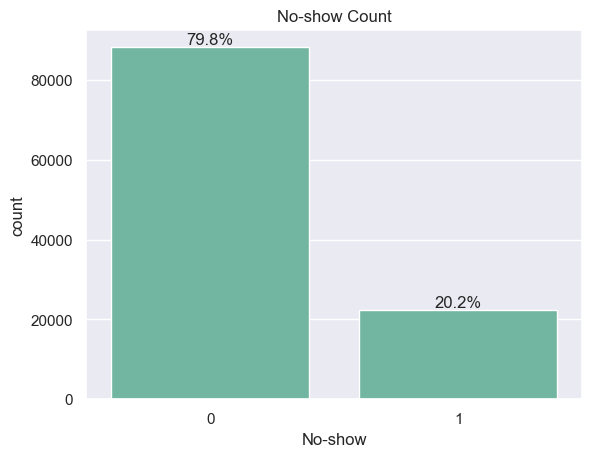

In [21]:
ax = sns.countplot(data=df, x='No-show')
for container in ax.containers:
  ax.bar_label(container, labels = [f'{(v.get_height()/len(df))*100:.1f}%'for v in container])
plt.title('No-show Count')

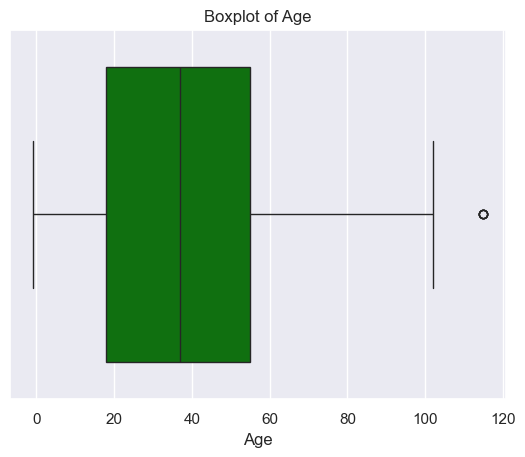

In [22]:
sns.boxplot(data=df, x='Age', color='green')
plt.title('Boxplot of Age')
plt.show()

In [23]:
df[df['Age']<0].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,0


In [24]:
df[df['Age']>100].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,0,0,0,0,0,0,0
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,1
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,1
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,1
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,0


In [25]:
df = df[df['Age'] >= 0] # Removing row with Age = -1

- There are some age outliers (above 100), but most patients are between 20 and 60.
- We removed invalid entries like Age = -1.
- We keep rows over Age = 100, as it's the same patient with different appt times.


In [26]:
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [27]:
age_bin = [0,18,40,65,120]      # Create bins for age ranges
age_labels = ['Kids','Adults', 'Mid-age', 'Old']      #labels for bins, always 1 less than no of bins
df['AgeGroup'] = pd.cut(df['Age'], bins = age_bin, labels= age_labels,include_lowest=True)    # pd.cut() takes a continuous variable (eg: Age) and turns it into categorical bins.

#### Age Distribution and Impact on No-show


In [28]:
df_Noshow_Agegroup = pd.crosstab(df['AgeGroup'], df['No-show'])         #Creates a frequency table showing: # of patients showed and No-showed for each AgeGroup
df_Noshow_Agegroup = df_Noshow_Agegroup.rename(columns={0:'Showed', 1:'No-showed'})         #renaming columns
print(df_Noshow_Agegroup)

No-show   Showed  No-showed
AgeGroup                   
Kids       22519       6347
Adults     24442       7375
Mid-age    30011       6531
Old        11235       2066


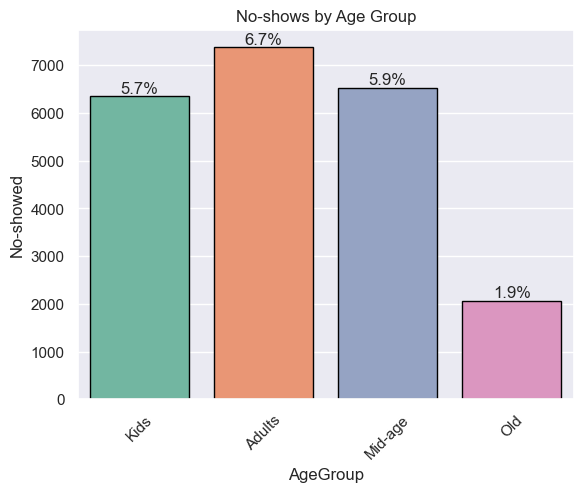

In [29]:
ax = sns.barplot(data=df_Noshow_Agegroup, x='AgeGroup', y='No-showed',hue ='AgeGroup', palette= 'Set2', edgecolor='black')
for container in ax.containers:
  ax.bar_label(container, labels = [f'{(v.get_height()/len(df))*100:.1f}%'for v in container])
plt.title('No-shows by Age Group')
plt.xticks(rotation=45)
plt.show()

In [30]:
chi2, p, dof, expected = chi2_contingency(df_Noshow_Agegroup) ## Chi test to confirm if column should be added in modelling
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)                        ##Chi-square test only works on pure frequency tables with no extra columns. only counts, Na total, Na percentage, Na calculated columns

p < 0.05 - Significant association. Keep this feature.
1.164526240486995e-115


- **Observation:** Adults have the most no-shows, followed by Kids and Mid-age group, also show significant dropout.Percentages show what share of total no-shows each age group contributes.
- **Chi-square p-value** < 0.05 confirms AgeGroup has a statistically significant effect on No-show status.


#### Visit Number Analysis (Visit_Number --> Visit_Group)

In [31]:
df['PatientID'] = df.groupby('PatientId').ngroup() # Create stable synthetic PT ID
df = df.drop(columns=['PatientId']) # Drop old PatientId column

In [32]:
df.sort_values(['PatientID', 'AppointmentDay', 'ScheduledDay'])

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,AgeGroup,PatientID
100517,5751990,F,2016-05-31 10:56:41+00:00,2016-06-03 00:00:00+00:00,44,PRAIA DO SUÁ,0,0,0,0,0,0,0,Mid-age,0
105430,5760144,M,2016-06-01 14:22:58+00:00,2016-06-01 00:00:00+00:00,39,MARIA ORTIZ,0,0,1,0,0,0,0,Adults,1
3950,5712759,F,2016-05-18 09:12:29+00:00,2016-05-18 00:00:00+00:00,33,CENTRO,0,0,0,0,0,0,0,Adults,2
73303,5637648,M,2016-04-29 07:13:36+00:00,2016-05-02 00:00:00+00:00,12,FORTE SÃO JOÃO,0,0,0,0,0,0,0,Kids,3
73228,5637728,F,2016-04-29 07:19:57+00:00,2016-05-06 00:00:00+00:00,14,FORTE SÃO JOÃO,0,0,0,0,0,1,0,Kids,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104616,5772701,M,2016-06-03 16:04:03+00:00,2016-06-07 00:00:00+00:00,90,JABOUR,0,0,0,0,0,1,0,Old,62293
3035,5639453,M,2016-04-29 09:07:06+00:00,2016-04-29 00:00:00+00:00,5,JESUS DE NAZARETH,0,0,0,0,0,0,0,Kids,62294
29705,5649678,M,2016-05-03 07:08:13+00:00,2016-05-03 00:00:00+00:00,65,SÃO PEDRO,1,1,0,0,0,0,0,Mid-age,62295
63048,5740680,F,2016-05-25 15:51:24+00:00,2016-05-25 00:00:00+00:00,81,JARDIM CAMBURI,0,0,0,0,0,0,0,Old,62296


In [33]:
# Create Visit Number per patient
df['Visit_Number'] = df.groupby('PatientID').cumcount() + 1

In [34]:
df['Visit_Number'].value_counts()

Visit_Number
1     62298
2     24379
3     10484
4      4984
5      2617
      ...  
71        2
85        1
86        1
87        1
88        1
Name: count, Length: 88, dtype: int64

In [35]:
df['Visit_Number'].describe()

count    110526.000000
mean          2.270326
std           3.913435
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          88.000000
Name: Visit_Number, dtype: float64

#### Understanding how patient visit history influences their appointment behavior is critical in healthcare scheduling.
To make this interpretable, the continuous Visit_Number variable was grouped into meaningful categories.
### Visit_Group Definitions
Patients were segmented into four realistic categories:

Visit_Group	          Visit_Number	      Interpretation
         
- First visit		   =         1	    =      New patient with no prior history

- Returning patient	=     2–4       =       Occasional returning patient

- Established patient  =    5–10 visits   =	 Regular, familiar with clinical workflow

- Chronic       =         	 11+ visits	  =   very frequent patient

In [36]:
def bucket_visits(x):    #creating visit group based on # of visits
    if x == 1:
        return 'First visit'
    elif x > 1 and x < 5:
        return 'Returning patient'
    elif x >= 5 and x <=10:
        return 'Established patient'
    else:
        return 'Chronic'

df['Visit_Group'] = df['Visit_Number'].apply(bucket_visits)

In [37]:
df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,AgeGroup,PatientID,Visit_Number,Visit_Group
0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Mid-age,30845,1,First visit
1,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Mid-age,55324,1,First visit
2,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,Mid-age,15722,1,First visit
3,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Kids,9018,1,First visit
4,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Mid-age,23941,1,First visit


In [38]:
#Calculate the total number of appointments and the no-show rate for each Visit_Group

df_Visit_NS_ct = pd.crosstab(df['Visit_Group'], df['No-show']).reset_index()
df_Visit_NS_ct = df_Visit_NS_ct.rename(columns= {0: 'Showed', 1: 'No-showed'})
df_Visit_NS_ct['Total_Patients'] = df_Visit_NS_ct['Showed'] + df_Visit_NS_ct['No-showed']
df_Visit_NS_ct['No-show %'] = ((df_Visit_NS_ct['No-showed']/df_Visit_NS_ct['Total_Patients']) *100).round(2)
df_Visit_NS_ct.head()

No-show,Visit_Group,Showed,No-showed,Total_Patients,No-show %
0,Chronic,1682,230,1912,12.03
1,Established patient,5026,1443,6469,22.31
2,First visit,50105,12193,62298,19.57
3,Returning patient,31394,8453,39847,21.21


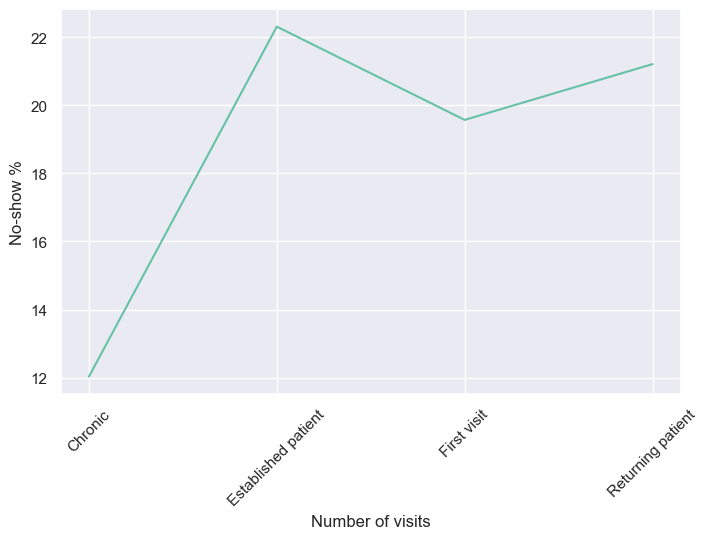

In [39]:
plt.figure(figsize=(8,5))
ax = sns.lineplot(data=df_Visit_NS_ct, x='Visit_Group', y='No-show %' )
plt.xlabel("Number of visits")
plt.xticks(rotation=45)
plt.show()

- Chronic patients have the lowest no-show rate (12.03%)
- First-visit patients show moderate no-show. Possible because unfamiliarity with location/process, anxiety, communication barriers, transportation issues.
- Returning & Established patients show the highest no-show rates (21–22%)

In [40]:
df_Visit_NS_chi = pd.crosstab(df['Visit_Group'], df['No-show'])
chi2, p, dof, expected = chi2_contingency(df_Visit_NS_chi) ## Chi test to confirm if column should be added in modelling
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

p < 0.05 - Significant association. Keep this feature.
1.2072633106663382e-29


- New patients (1–5 visits) show a higher no-show rate (19.57 - 22.31%)
- Long-term patients (11+ visits) show a much lower no-show rate of 12.03%
- p < 0.05, Visit history is strongly associated with appointment attendance.

### Past No-Shows BEFORE current visit

In [41]:
# Past No-Shows BEFORE current visit
df['Past_NoShow_Count'] = (df.groupby('PatientID')['No-show'].transform(lambda x: (x.shift() == 1).cumsum()))

In [42]:
df['Reliability_Score'] = df['Past_NoShow_Count'] / (df['Visit_Number'] + 1)

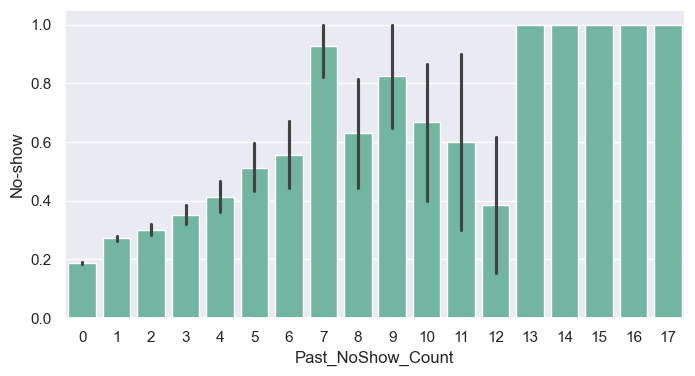

In [43]:
plt.figure(figsize=(8,4))
sns.barplot(x='Past_NoShow_Count', y='No-show', data=df)
plt.show()

In [44]:
# Bucket the feature Past_NoShow_Count to reduce noise as counts above 10 has very few patients
def bucket_ns(x):
    if x == 0:
        return '0'
    elif x <= 2:
        return '1-2'
    elif x <= 5:
        return '3-5'
    else:
        return '6+'

df['Past_NoShow_Bucket'] = df['Past_NoShow_Count'].apply(bucket_ns)

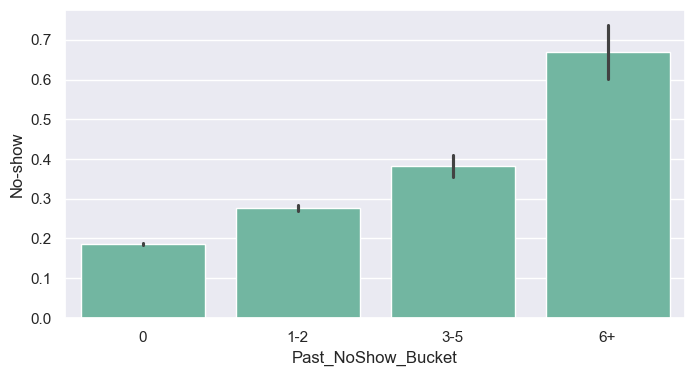

In [45]:
plt.figure(figsize=(8,4))
sns.barplot(x='Past_NoShow_Bucket', y='No-show', data=df)
plt.show()

Past NoShow buscket = 0 past no-shows > low risk

1–2 past no-shows > moderate

3–5 past no-shows > high

6+ past no-shows > very high

In [46]:
table = pd.crosstab(df['Past_NoShow_Bucket'], df['No-show'])
chi2, p, dof, expected = chi2_contingency(table)
print(p)

2.0768537163792736e-252


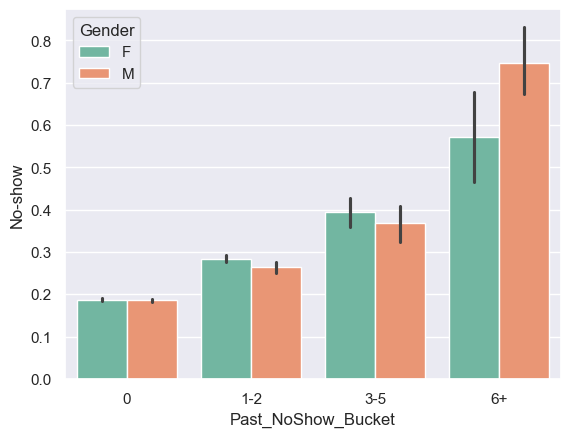

In [47]:
sns.barplot(x='Past_NoShow_Bucket', y='No-show', hue='Gender', data=df)
plt.show()

No-show probability increases sharply with history of past no-shows for both genders. Gender does not significantly modify the relationship

In [48]:
df_Age_Visit_Group_ct = pd.crosstab(df['Visit_Group'],df['AgeGroup']).reset_index()
df_Age_Visit_Group_ct.head()

AgeGroup,Visit_Group,Kids,Adults,Mid-age,Old
0,Chronic,221,472,1109,110
1,Established patient,1382,1831,2373,883
2,First visit,17113,17419,20054,7712
3,Returning patient,10150,12095,13006,4596


In [49]:
df_Age_Visit_Group_Noshow = pd.crosstab([df['Visit_Group'],df['AgeGroup']],df['No-show']).reset_index()
df_Age_Visit_Group_Noshow = df_Age_Visit_Group_Noshow.rename(columns= {0:'Showed', 1: 'No-showed'})
df_Age_Visit_Group_Noshow['Total Patients'] = df_Age_Visit_Group_Noshow['Showed'] + df_Age_Visit_Group_Noshow['No-showed']
df_Age_Visit_Group_Noshow['Noshow % per Agegroup'] = ((df_Age_Visit_Group_Noshow['No-showed']/df_Age_Visit_Group_Noshow['Total Patients']) *100).round(2)
df_Age_Visit_Group_Noshow.reset_index(inplace=True)
df_Age_Visit_Group_Noshow.head()

No-show,index,Visit_Group,AgeGroup,Showed,No-showed,Total Patients,Noshow % per Agegroup
0,0,Chronic,Kids,137,84,221,38.01
1,1,Chronic,Adults,416,56,472,11.86
2,2,Chronic,Mid-age,1033,76,1109,6.85
3,3,Chronic,Old,96,14,110,12.73
4,4,Established patient,Kids,981,401,1382,29.02


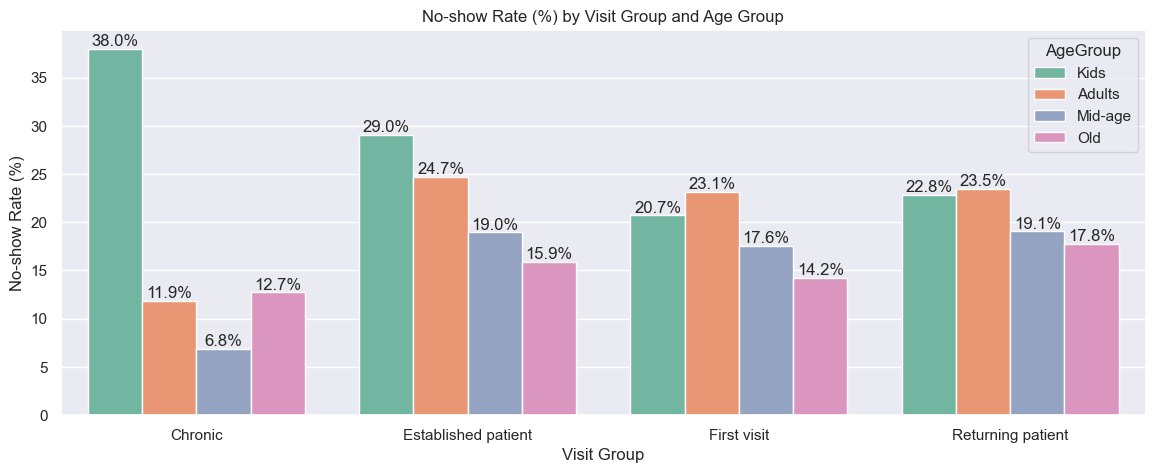

In [50]:
plt.figure(figsize=(14,5))          ## Which reminder method is most effective for which age group?
ax = sns.barplot(data=df_Age_Visit_Group_Noshow, x = 'Visit_Group' ,y='Noshow % per Agegroup', hue = 'AgeGroup', errorbar=None)
for container in ax.containers:
  ax.bar_label(container, fmt= '%.1f%%' )
plt.title('No-show Rate (%) by Visit Group and Age Group')
plt.xlabel('Visit Group')
plt.xticks(rotation=360)
plt.ylabel('No-show Rate (%)')
plt.show()

- Kids in Chronic and Established patient group have highest no-show. (38% and 29%)
- Adults in Established Patients, First visit and returning patient group have highest no show 4rate.
- Mid-age & Old generally lower no-show risk

In [51]:
df_Age_Visit_Group_Noshow_chi = pd.crosstab([df['Visit_Group'],df['AgeGroup']] , df['No-show'])
chi2, p, dof, expected = chi2_contingency(df_Age_Visit_Group_Noshow_chi) ## Chi test to confirm if column should be added in modelling
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)


p < 0.05 - Significant association. Keep this feature.
4.645681687361256e-160


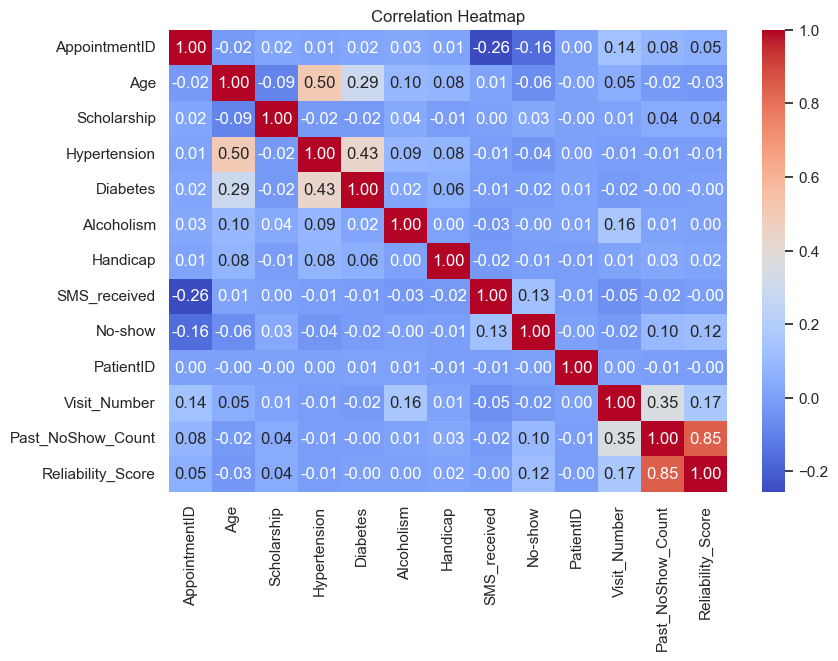

In [52]:
plt.figure(figsize=(9,6))
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt= ".2f")
plt.title("Correlation Heatmap")
plt.show()

**Analyzing Scholarship column**

In [53]:
df_Scholarship_Noshow = pd.crosstab(df['Scholarship'], df['No-show'])
df_Scholarship_Noshow = df_Scholarship_Noshow.rename(columns={0:'Showed', 1:'No-showed'})
print(df_Scholarship_Noshow)

No-show      Showed  No-showed
Scholarship                   
0             79924      19741
1              8283       2578


In [54]:
chi2, p, dof, expected = chi2_contingency(df_Scholarship_Noshow)
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

p < 0.05 - Significant association. Keep this feature.
3.9268156991039656e-22


In [55]:
df_Scholarship_Noshow['No-showed %'] = (df_Scholarship_Noshow['No-showed']/ (df_Scholarship_Noshow['Showed'] + df_Scholarship_Noshow['No-showed']) *100).round(1)
print(df_Scholarship_Noshow)

No-show      Showed  No-showed  No-showed %
Scholarship                                
0             79924      19741         19.8
1              8283       2578         23.7


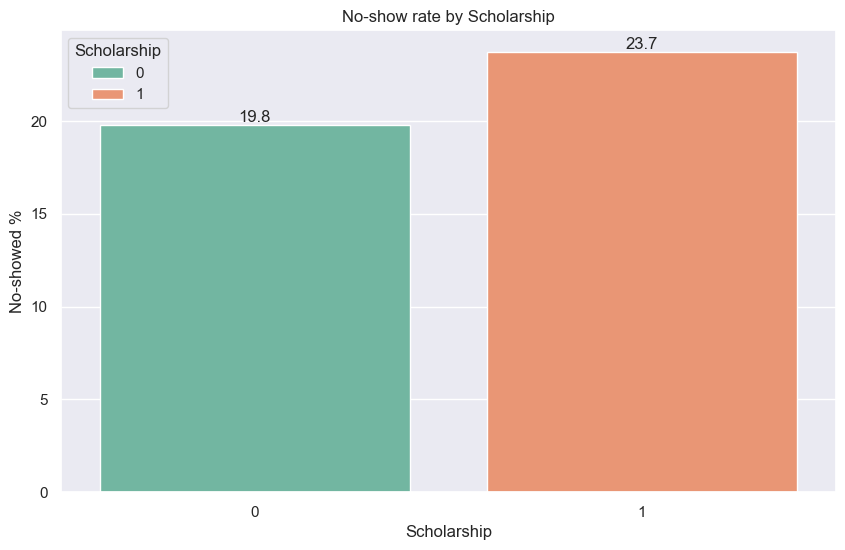

In [56]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data = df_Scholarship_Noshow, x = 'Scholarship', y = 'No-showed %',hue ='Scholarship', palette= 'Set2')
for container in ax.containers:
  ax.bar_label(container)
plt.title('No-show rate by Scholarship')
plt.show()

- Patients who received scholarship had a **higher no-show rate (23.7%)** than those who did not (19.8%).
- Chi-square p-value confirms this difference is statistically significant (p < 0.05).
- Hospitals may need to investigate if socioeconomic factors influence attendance.


**Analyzing Hypertension column**

In [57]:
df_Hypertension_Noshow = pd.crosstab(df['Hypertension'], df['No-show'])
df_Hypertension_Noshow = df_Hypertension_Noshow.rename(columns={0:'Showed', 1:'No-showed'})
print(df_Hypertension_Noshow)

No-show       Showed  No-showed
Hypertension                   
0              70178      18547
1              18029       3772


In [58]:
chi2, p, dof, expected = chi2_contingency(df_Hypertension_Noshow)
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

p < 0.05 - Significant association. Keep this feature.
1.9011212241495915e-32


- p-value < 0.05 indicates Hypertension status is significantly associated with no-shows.


In [59]:
df_Hypertension_Noshow['No-showed %'] = (df_Hypertension_Noshow['No-showed']/ (df_Hypertension_Noshow['Showed'] + df_Hypertension_Noshow['No-showed'])*100).round(1)
print(df_Hypertension_Noshow)

No-show       Showed  No-showed  No-showed %
Hypertension                                
0              70178      18547         20.9
1              18029       3772         17.3


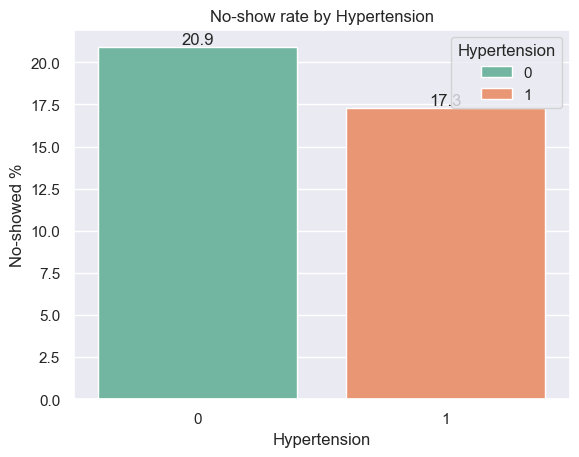

In [60]:
ax = sns.barplot(data = df_Hypertension_Noshow, x = 'Hypertension', y = 'No-showed %', hue='Hypertension', palette= 'Set2')

for container in ax.containers:
  ax.bar_label(container)
plt.title('No-show rate by Hypertension')
plt.show()

- Patients with hypertension have a **lower no-show rate (17.3%)** compared to those without (20.9%).

**Analyzing Diabetes column**

In [61]:
df_Diabetes_Noshow = pd.crosstab(df['Diabetes'], df['No-show'])
df_Diabetes_Noshow  = df_Diabetes_Noshow.rename(columns={0:'Showed', 1:'No-showed'})
print(df_Diabetes_Noshow)

No-show   Showed  No-showed
Diabetes                   
0          81694      20889
1           6513       1430


In [62]:
chi2, p , dof, expected = chi2_contingency(df_Diabetes_Noshow)
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

p < 0.05 - Significant association. Keep this feature.
4.83964682088023e-07


In [63]:
df_Diabetes_Noshow['No-showed %'] = (df_Diabetes_Noshow['No-showed']/ (df_Diabetes_Noshow['Showed'] + df_Diabetes_Noshow['No-showed']) *100).round(1)
print(df_Diabetes_Noshow)

No-show   Showed  No-showed  No-showed %
Diabetes                                
0          81694      20889         20.4
1           6513       1430         18.0


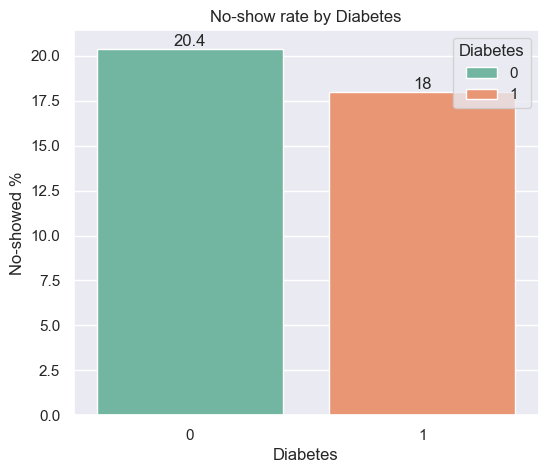

In [64]:
plt.figure(figsize=(6,5))
ax = sns.barplot(data = df_Diabetes_Noshow, x = 'Diabetes', y = 'No-showed %', hue = 'Diabetes', palette= 'Set2')
for container in ax.containers:
  ax.bar_label(container)
plt.title('No-show rate by Diabetes')
plt.show()

- Patients with diabetes have a slightly **lower no-show rate (18%)** compared to non-diabetic patients (20.4%).
- This may reflect better follow-up adherence due to ongoing care routines.
- Since **p < 0.05**, the difference in no-show rates between diabetic and non-diabetic patients is statistically significant.

**Analyzing Alcoholism column**

In [65]:
df_Alcoholism_Noshow = pd.crosstab(df['Alcoholism'], df['No-show'])
df_Alcoholism_Noshow = df_Alcoholism_Noshow.rename(columns={0:'Showed', 1:'No-showed'})
print(df_Alcoholism_Noshow)

No-show     Showed  No-showed
Alcoholism                   
0            85524      21642
1             2683        677


In [66]:
chi2, p, dof, expected = chi2_contingency(df_Alcoholism_Noshow)
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

Not significant.
0.9652054249010444


In [67]:
df_Alcoholism_Noshow['No-showed %'] = (df_Alcoholism_Noshow['No-showed']/ (df_Alcoholism_Noshow['Showed'] + df_Alcoholism_Noshow['No-showed']) *100).round(1)
print(df_Alcoholism_Noshow)

No-show     Showed  No-showed  No-showed %
Alcoholism                                
0            85524      21642         20.2
1             2683        677         20.1


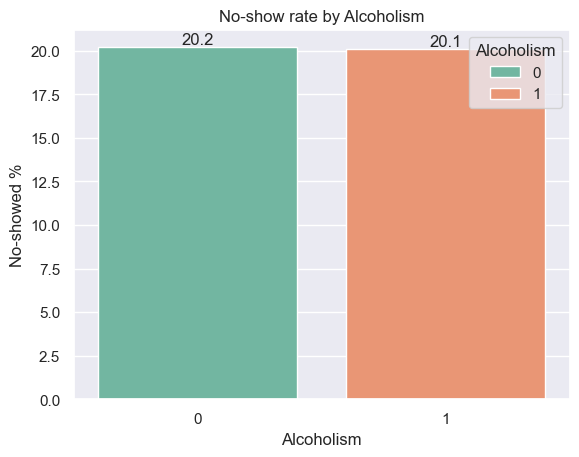

In [68]:
ax = sns.barplot(data = df_Alcoholism_Noshow, x = 'Alcoholism', y = 'No-showed %', hue = 'Alcoholism', palette= 'Set2')

for container in ax.containers:
  ax.bar_label(container)
plt.title('No-show rate by Alcoholism')
plt.show()

- The no-show rates are almost the same for both groups (20%).
- This suggests alcoholism status does not strongly influence attendance patterns in this dataset.

**Analyzing Handicap column**

In [69]:
df_Handicap_Noshow = pd.crosstab(df['Handicap'], df['No-show']).reset_index()
df_Handicap_Noshow = df_Handicap_Noshow.rename(columns={0:'Showed', 1:'No-showed'})
df_Handicap_Noshow['No-showed %'] = (df_Handicap_Noshow['No-showed']/ (df_Handicap_Noshow['Showed'] + df_Handicap_Noshow['No-showed'])*100).round(1)
print(df_Handicap_Noshow)

No-show  Handicap  Showed  No-showed  No-showed %
0               0   86373      21912         20.2
1               1    1676        366         17.9
2               2     146         37         20.2
3               3      10          3         23.1
4               4       2          1         33.3


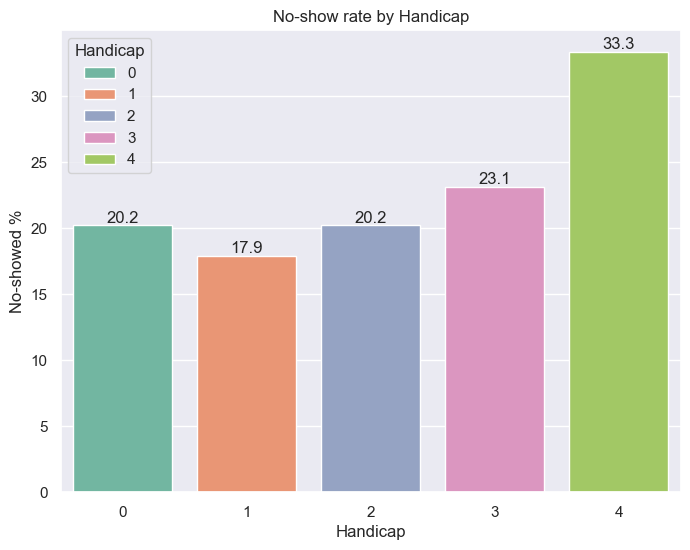

In [70]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data = df_Handicap_Noshow, x = 'Handicap', y = 'No-showed %', hue = 'Handicap', palette= 'Set2')
for container in ax.containers:
  ax.bar_label(container)
plt.title('No-show rate by Handicap')
plt.show()

**Interpretation:**
- Handicap = 0 and 2 (20.2% no-shows)
- Handicap = 1, slightly lower at 17.9%
- Handicap = 4, highest at 33.3%

This suggests that patients with higher handicap levels may have more challenges reaching their appointments.

In [71]:
df_Handicap_Noshow_chi = pd.crosstab(df['Handicap'], df['No-show'])
chi2, p, dof, expected = chi2_contingency(df_Handicap_Noshow_chi)
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)


Not significant.
0.13401931354992297


**Chi-square p-value = 0.134** p-value > 0.05, the difference in no-show rates across handicap levels is **not statistically significant**.  
However, the upward trend still provides valuable operational insight.

### ***Waiting Days*** (Appoitment Day - Scheduled Day)

In [72]:
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [73]:
df['WaitingDays'].isnull().sum()

np.int64(0)

In [74]:
df['WaitingDays'].describe()

count    110526.000000
mean          9.183794
std          15.255034
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: WaitingDays, dtype: float64

In [75]:
WTdays_bin = [-7,0,7,30,60,90, 178]
WTdays_labels = ['Same Day', 'Week', 'Month', '2 Months', '3 Months', '3 Months+']
df['WaitingDays_bin'] = pd.cut(df['WaitingDays'], bins = WTdays_bin, labels= WTdays_labels, include_lowest=True)
df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,...,No-show,AgeGroup,PatientID,Visit_Number,Visit_Group,Past_NoShow_Count,Reliability_Score,Past_NoShow_Bucket,WaitingDays,WaitingDays_bin
0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,...,0,Mid-age,30845,1,First visit,0,0.0,0,-1,Same Day
1,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,...,0,Mid-age,55324,1,First visit,0,0.0,0,-1,Same Day
2,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,...,0,Mid-age,15722,1,First visit,0,0.0,0,-1,Same Day
3,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,...,0,Kids,9018,1,First visit,0,0.0,0,-1,Same Day
4,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,...,0,Mid-age,23941,1,First visit,0,0.0,0,-1,Same Day


In [76]:
print("Missing values in New dataset:")  # Check for missing values in new df
print(df.isnull().sum())

Missing values in New dataset:
AppointmentID         0
Gender                0
ScheduledDay          0
AppointmentDay        0
Age                   0
Neighbourhood         0
Scholarship           0
Hypertension          0
Diabetes              0
Alcoholism            0
Handicap              0
SMS_received          0
No-show               0
AgeGroup              0
PatientID             0
Visit_Number          0
Visit_Group           0
Past_NoShow_Count     0
Reliability_Score     0
Past_NoShow_Bucket    0
WaitingDays           0
WaitingDays_bin       0
dtype: int64


In [77]:
df['WaitingDays'].value_counts()

WaitingDays
-1      38562
 1       6725
 3       5290
 0       5213
 6       4906
        ...  
 81         1
 126        1
 125        1
 150        1
 122        1
Name: count, Length: 131, dtype: int64

In [100]:
df_WTdays_NS_ct = pd.crosstab(df['WaitingDays_bin'],df['No-show']).reset_index()
df_WTdays_NS_ct = df_WTdays_NS_ct.rename(columns={0:'Showed', 1:'No-showed'})
df_WTdays_NS_ct['No-show %'] = (df_WTdays_NS_ct['No-showed']/(df_WTdays_NS_ct['Showed']+ df_WTdays_NS_ct['No-showed'])*100).round(1)
print(df_WTdays_NS_ct)

No-show WaitingDays_bin  Showed  No-showed  No-show %
0              Same Day   40870       2910        6.6
1                  Week   21975       7329       25.0
2                 Month   18861       8875       32.0
3              2 Months    5106       2640       34.1
4              3 Months    1278        521       29.0
5             3 Months+     117         44       27.3


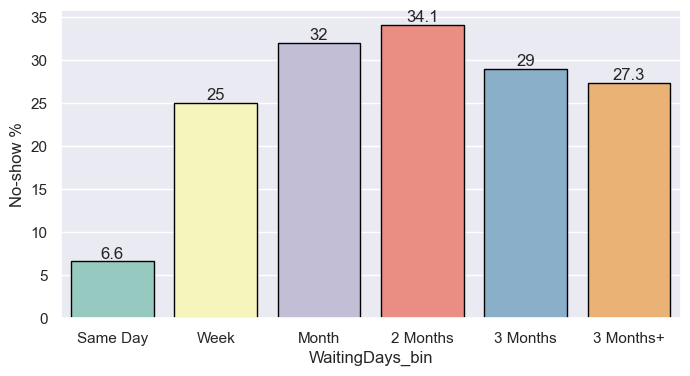

In [102]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data = df_WTdays_NS_ct, x = 'WaitingDays_bin', y = 'No-show %', hue ='WaitingDays_bin', palette= 'Set3', edgecolor='black')
for container in ax.containers:
  ax.bar_label(container)
plt.show()

In [103]:
df_WTdays_NS_chi = pd.crosstab(df['WaitingDays'],df['No-show'])
chi2, p, dof, expected = chi2_contingency(df_WTdays_NS_chi) ## Chi test to confirm if column should be added in modelling
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

p < 0.05 - Significant association. Keep this feature.
0.0


- Patients who waited 1–2 months had the highest no-show rates (up to 34%).
- Chi-square test confirms waiting days is a statistically significant predictor.

Analyzing Impact of Appointment Day on No-show rate

In [104]:
df['Appointment_Day'] = df['AppointmentDay'].dt.day_name()

In [105]:
df_Apptday_NS_ct = pd.crosstab(df['Appointment_Day'], df['No-show']).reset_index()
df_Apptday_NS_ct = df_Apptday_NS_ct.rename(columns= {0: 'Showed', 1: 'No-showed'})
df_Apptday_NS_ct['No-show %'] = (df_Apptday_NS_ct['No-showed']/(df_Apptday_NS_ct['Showed'] + df_Apptday_NS_ct['No-showed'])*100).round(2)
print(df_Apptday_NS_ct)

No-show Appointment_Day  Showed  No-showed  No-show %
0                Friday   14982       4037      21.23
1                Monday   18024       4690      20.65
2              Saturday      30          9      23.08
3              Thursday   13909       3338      19.35
4               Tuesday   20488       5152      20.09
5             Wednesday   20774       5093      19.69


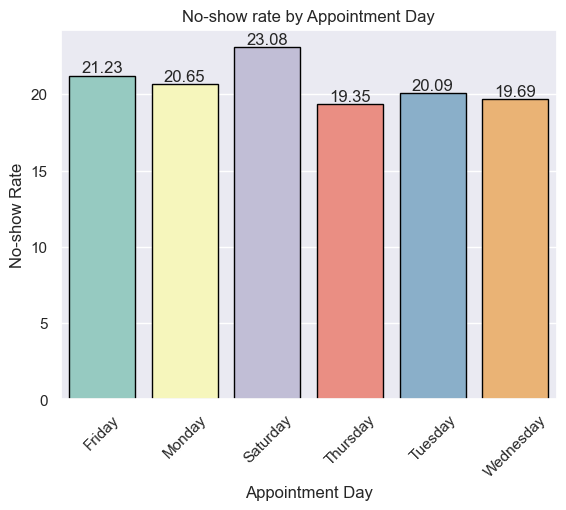

In [106]:
ax = sns.barplot(data=df_Apptday_NS_ct, x='Appointment_Day', y='No-show %',hue = 'Appointment_Day', palette='Set3',edgecolor='black')
for container in ax.containers:
  ax.bar_label(container)
plt.title('No-show rate by Appointment Day')
plt.xticks(rotation=45)
plt.xlabel('Appointment Day')
plt.ylabel('No-show Rate')
plt.show()

In [107]:
df_Apptday_NS_chi = pd.crosstab(df['Appointment_Day'], df['No-show'])
chi2, p, dof, expected = chi2_contingency(df_Apptday_NS_chi) ## Chi test to confirm if column should be added in modelling
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

p < 0.05 - Significant association. Keep this feature.
4.5990638655592554e-05


- Patients scheduled on **Saturday** had the highest no-show rate (23.1%), but sample size is very small.
- Weekdays like **Friday** and **Monday** show slightly elevated no-shows.

**Adding Synthetic Data**
These reflect real-world scheduling behaviors and will help in prediction. Factors like medical transport reliance, appointment confirmed yet no showed, and first-visit anxiety are commonly observed in hospitals and clinics.

These features will help:
1.  Make the dataset more realistic
2.  Improve the accuracy of prediction models
3.  Support real-life scenario planning for apps like Appointment scheduling tools




#### **1. Medical_Transport**
Does Medical Transport Reduce No-Shows?

Context: Medical transportation is often offered to elderly or disabled patients but is it being used effectively? And more importantly, does it reduce missed appointments?
This synthetic column flag if a patient likely required medical transport to reach their appointment. In real-world healthcare systems, **medical transportation is one of the most cited barriers** to appointment attendance, especially for elderly or disabled patients.
Many low-income, elderly, or disabled patients rely on Non-Emergency Medical Transportation (NEMT) vans. Delays, miscommunication, or lack of coverage can cause them to miss appointments even if they had full intent to show up. Adding this column improves the **predictive power** and **realism** of our model.

####Assumptions
We used patient **Age** and **Handicap** status to determine the chance of needing medical transport:
- 40–60% of patients who are elderly (85+) or have a disability (Handicap > 0) use medical transport.
- Others using may include Medicaid transport vans or Non-Emergency Medical Transport

<h4>Real-World Insight:</h4>

*   Transportation barriers is one of the cited reasons for missed healthcare appointments.
*   Patients dependent on medical vans are at higher risk of no-shows, especially in cases of delay or miscommunication.
* Incorporating this into our predictive model adds both realism and policy relevance.

<h4>Future Consideration:</h4>

- Healthcare providers could reduce no-shows by partnering with platforms like [RoundTrip Health](https://roundtriphealth.com) to proactively coordinate patient transport.

According to the CDC and National Academies, **3.6 million people in the U.S. miss or delay medical care annually due to transportation barriers**.
Further, research published in [BMC Public Health (2020)](https://pmc.ncbi.nlm.nih.gov/articles/PMC7204444/) found that **lack of transport access was a major reason for missed appointments**, especially among patients with mental health or economic challenges.
These statistics show the importance of including medical transport in our predictive model — not just as a health equity issue, but as a practical scheduling factor.


In [108]:
# Set seed for reproducibility
np.random.seed(42)

In [109]:
def assign_medical_transport(row):
   if row['Age'] >=85 and row['Handicap'] > 2:   #Very elderly and highly disabled
    return (int(np.random.rand() <0.80))
   elif row['Age'] >=70 and row['Handicap'] < 3:   #Elderly with mild/moderate disability
    return (int(np.random.rand() <0.60))
   elif row['Age'] <18:                     #Kids usually don't use transport alone
    return (int(np.random.rand() <0.02))
   elif row['Age'] <70 and row['Handicap'] == 0:   #Adults & healthy
    return (int(np.random.rand() <0.10))
   elif row['Age'] <70 and row['Handicap'] >= 3:       # Adults but severely disabled
    return (int(np.random.rand() <0.30))
   elif row['Age'] < 70 and 0 < row['Handicap'] < 3:       # Adult with mild/moderate disability
        return int(np.random.rand() < 0.25)
   else:                                        # Others- 15%
    return (int(np.random.rand() < 0.15))

np.random.seed(42)
df['Medical_Transport'] = df.apply(assign_medical_transport, axis =1)

In [110]:
def Handicap_Old(row):         ### %age of >= Age group and Handicap group
  if row['Age'] >=70 and row['Handicap'] > 0:
    return 'Elderly and Disabled'
  elif row['Age']>=70:
    return 'Only Elderly'
  elif row['Handicap'] > 0:
    return 'Only Disabled'
  else:
    return 'Neither'

df['Handicap/Old'] = df.apply(Handicap_Old, axis=1)

print(df['Handicap/Old'].value_counts(normalize=True))

Handicap/Old
Neither                 0.900286
Only Elderly            0.079438
Only Disabled           0.015598
Elderly and Disabled    0.004678
Name: proportion, dtype: float64


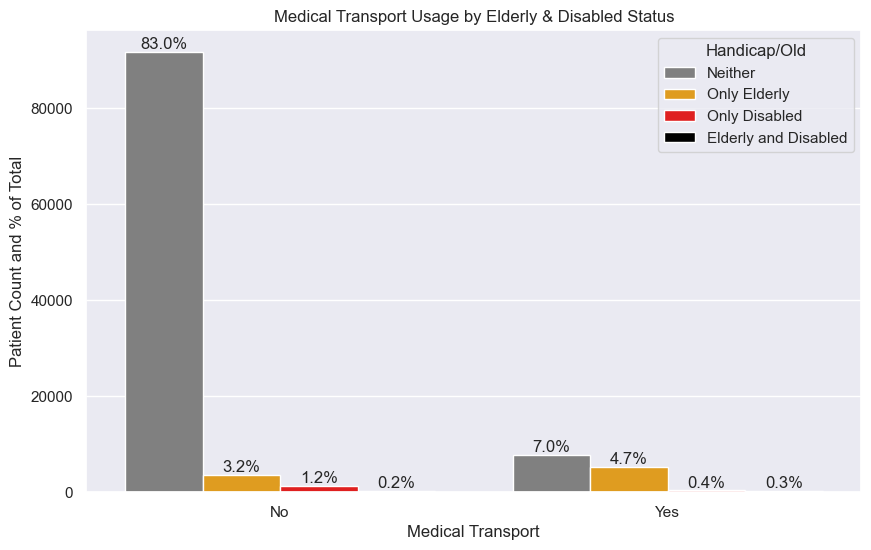

In [111]:
MT_colors = { 'Neither': 'Grey', 'Only Elderly': 'Orange', 'Only Disabled': 'red', 'Elderly and Disabled': 'Black'}
df['MT_Label'] = df['Medical_Transport'].map({0: 'No', 1: 'Yes'})

plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='MT_Label',hue= 'Handicap/Old',  palette=MT_colors,  order = df['MT_Label'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, labels= [f'{(v.get_height()/len(df))*100:.1f}%'for v in container])
plt.title('Medical Transport Usage by Elderly & Disabled Status')
plt.xlabel('Medical Transport')
plt.ylabel('Patient Count and % of Total')
plt.show()


### Graph - Medical Transport Usage by Elderly & Disabled Status
Despite common assumptions, the majority of patients who use medical transport are neither elderly nor physically disabled.
This suggests:
- Many adult patients also face mobility/access issues
- Social drivers of health like income, access, and distance might be at play
- Insurance programs (like Medicaid) might cover transport for more than just elderly

The bar chart confirms **7% of all patients using medical transport** belong to the ‘Neither’ group.

Suggestion: Healthcare providers could reduce no-shows by partnering with platforms like RoundTrip Health to proactively coordinate patient transport.

In [112]:
df_MT_filtered = df[df['Medical_Transport']==1].copy() ## Filtered dataframe, where Medical Transport = 1 (Medical Transport used)
(df_MT_filtered.head())

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,...,Visit_Group,Past_NoShow_Count,Reliability_Score,Past_NoShow_Bucket,WaitingDays,WaitingDays_bin,Appointment_Day,Medical_Transport,Handicap/Old,MT_Label
5,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,...,First visit,0,0.0,0,1,Week,Friday,1,Only Elderly,Yes
6,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,...,First visit,0,0.0,0,1,Week,Friday,1,Neither,Yes
10,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,...,First visit,0,0.0,0,1,Week,Friday,1,Neither,Yes
29,5642186,F,2016-04-29 15:16:29+00:00,2016-04-29 00:00:00+00:00,32,SANTA MARTHA,0,0,0,0,...,First visit,0,0.0,0,-1,Same Day,Friday,1,Neither,Yes
32,5637908,M,2016-04-29 07:30:27+00:00,2016-04-29 00:00:00+00:00,61,SÃO CRISTÓVÃO,0,1,0,0,...,First visit,0,0.0,0,-1,Same Day,Friday,1,Neither,Yes


In [113]:
MTusers_Noshowed = pd.crosstab(df_MT_filtered['No-show'],df_MT_filtered['Handicap/Old'])
print(MTusers_Noshowed)

Handicap/Old  Elderly and Disabled  Neither  Only Disabled  Only Elderly
No-show                                                                 
0                              256     6163            322          4415
1                               63     1616             68           820


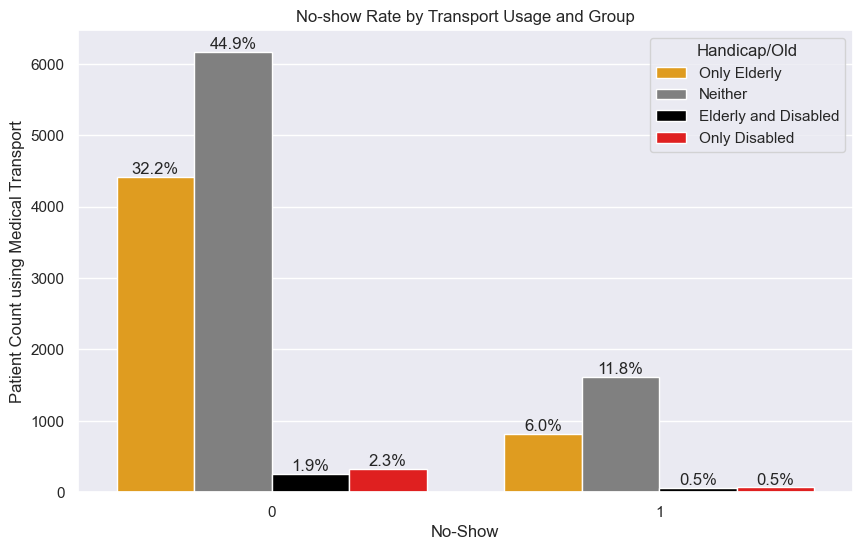

In [114]:
plt.figure(figsize=(10,6))   #### Using df = df_MT_filtered, where Medical Transport = 1
ax = sns.countplot(data = df_MT_filtered, x = 'No-show',hue= 'Handicap/Old', palette= MT_colors, order = df['No-show'].value_counts().index)
for container in ax.containers:
  ax.bar_label(container, labels= [f'{(v.get_height()/len(df_MT_filtered))*100:.1f}%'for v in container])
sns.set_palette("Set1")
plt.title("No-show Rate by Transport Usage and Group")
plt.xlabel('No-Show')
plt.ylabel('Patient Count using Medical Transport')
plt.show()

#### Graph - No-show due to Medical Transport
This chart reveals how often patients (where the patient is either >=70 or disabled or neither) who used medical transport still ended up missing their appointment.

- The majority of no-shows are from patients who are neither old nor disabled but use medical transport. This challenges the common assumption that transport support is only relevant for elderly/disabled groups.
- Hospitals could offer transport and also track **confirmation + successful pickup**.
- Partnering with **RoundTrip Health**, Uber Health, or local Medicaid ride vendors could help **reduce transport-related no-shows** by 10–15%.

In [115]:
chi2, p, dof, expected = chi2_contingency(MTusers_Noshowed)  ## Medical Transport and No-show have a statistically significant relationship as chi-square p < 0.05
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

p < 0.05 - Significant association. Keep this feature.
9.323209738181208e-12


### Heatmap Summary: Transport Usage vs. No-Show

In [116]:
## creating dataframe df_MTusage for further analsis
df_MTusage = pd.crosstab([df['AgeGroup'],df['Handicap/Old']], df['Medical_Transport'] )
df_MTusage = df_MTusage.rename(columns={0: 'MT_No', 1: 'MT_Yes'})
df_MTusage['Total_Pt'] = df_MTusage['MT_No'] + df_MTusage['MT_Yes']
df_MTusage['Groupwise_MT_Usage_%'] = (df_MTusage['MT_Yes']/df_MTusage['Total_Pt']) * 100
df_MTusage['Overall_transport_usage_%'] = (df_MTusage['MT_Yes']/(len(df)))*100
df_MTusage['Group_NoShowRate'] = ((df.groupby(['AgeGroup', 'Handicap/Old'], observed=True)['No-show'].sum())/df_MTusage['Total_Pt']) *100
df_MTusage['MT_NoShowRate'] = ((df[df['Medical_Transport']==1].groupby(['AgeGroup', 'Handicap/Old'], observed=True)['No-show'].sum())/df_MTusage['MT_Yes'])*100
df_MTusage.head(10)

Medical_Transport              MT_No  MT_Yes  Total_Pt  Groupwise_MT_Usage_%  \
AgeGroup Handicap/Old                                                          
Kids     Neither               27902     697     28599              2.437148   
         Only Disabled           252      15       267              5.617978   
Adults   Neither               28199    3130     31329              9.990743   
         Only Disabled           362     126       488             25.819672   
Mid-age  Neither               32102    3577     35679             10.025505   
         Only Disabled           638     225       863             26.071842   
Old      Elderly and Disabled    198     319       517             61.702128   
         Neither                3523     375      3898              9.620318   
         Only Disabled            82      24       106             22.641509   
         Only Elderly           3545    5235      8780             59.624146   

Medical_Transport              Overall_transport_usage_%  Group_NoShowRate  \
AgeGroup Handicap/Old                                                        
Kids     Neither                                0.630621         21.927340   
         Only Disabled                          0.013571         28.464419   
Adults   Neither                                2.831913         23.281943   
         Only Disabled                          0.114000         16.598361   
Mid-age  Neither                                3.236343         17.909695   
         Only Disabled                          0.203572         16.338355   
Old      Elderly and Disabled                   0.288620         18.181818   
         Neither                                0.339287         15.366855   
         Only Disabled                          0.021714         14.150943   
         Only Elderly                           4.736442         15.466970   

Medical_Transport              MT_NoShowRate  
AgeGroup Handicap/Old                         
Kids     Neither                   23.529412  
         Only Disabled             20.000000  
Adults   Neither                   24.057508  
         Only Disabled             20.634921  
Mid-age  Neither                   18.143696  
         Only Disabled             16.000000  
Old      Elderly and Disabled      19.749216  
         Neither                   13.333333  
         Only Disabled             12.500000  
         Only Elderly              15.663801

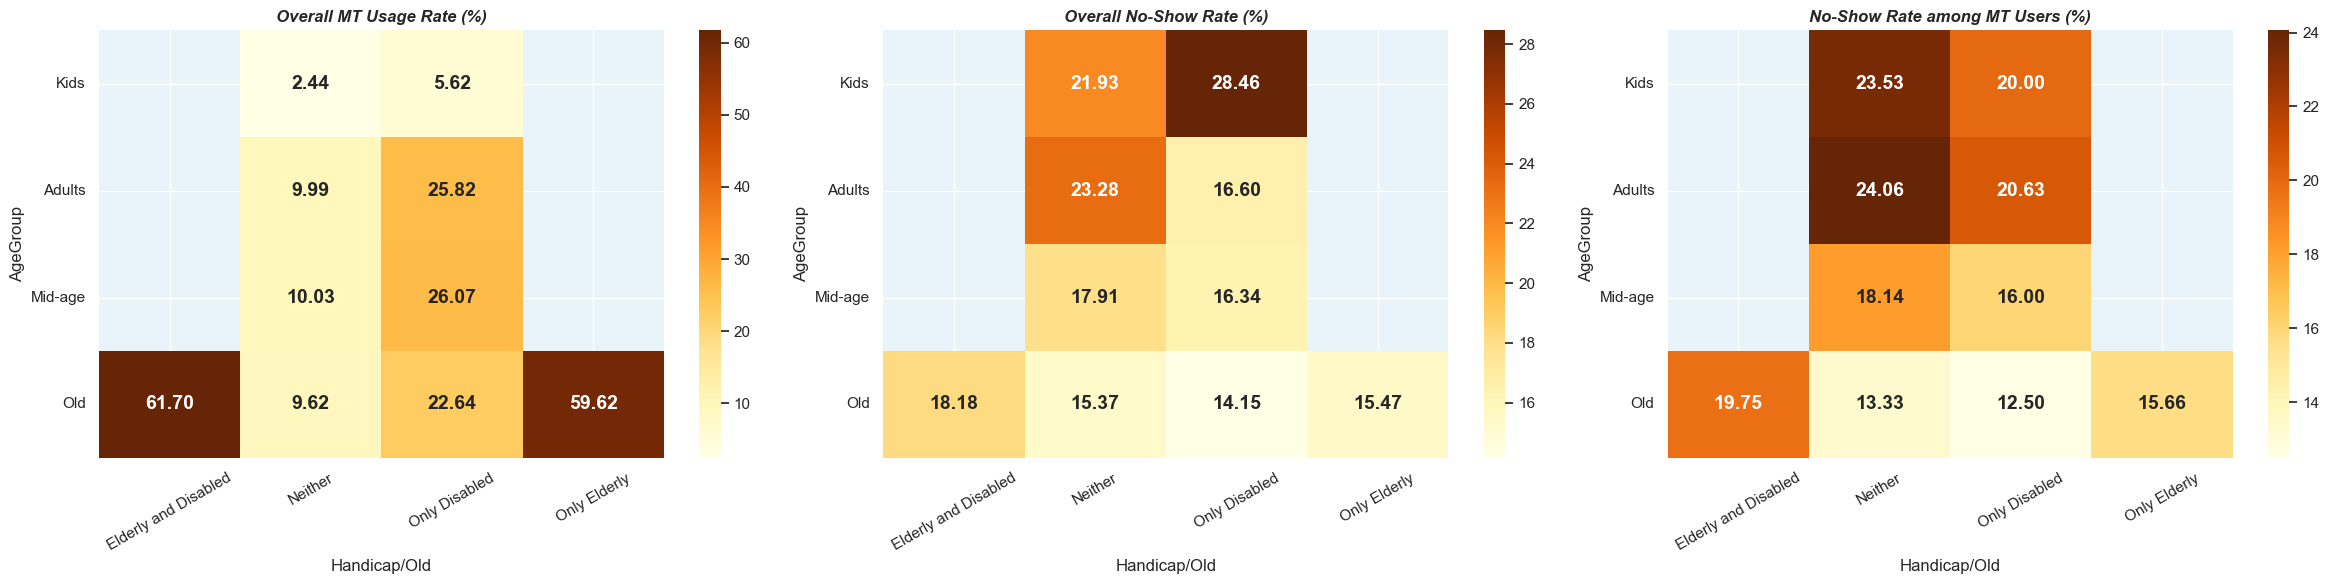

In [117]:
# Reset index so we can pivot easily
# - `pd.crosstab()` creates a **pivot-style DataFrame** (2D matrix), perfect for **heatmaps** and grouped analysis.
# - If we use `reset_index()` on crosstab, it becomes a **flat table** — useful for viewing, adding new columns, or merging.
# - However, to use that flat table in a heatmap, we must pivot it back to 2D matrix format using `.pivot()`.


# Pivot for No-show % by group
df_MTusage_heatmap1 = df_MTusage.reset_index().pivot(index='AgeGroup', columns='Handicap/Old', values='Groupwise_MT_Usage_%')
df_MTusage_heatmap2 = df_MTusage.reset_index().pivot(index='AgeGroup', columns='Handicap/Old', values='Group_NoShowRate')
df_MTusage_heatmap3 = df_MTusage.reset_index().pivot(index='AgeGroup', columns='Handicap/Old', values='MT_NoShowRate')

## To make the percentage values in each cell bold and larger inside your seaborn heatmaps, modify the *annot_kws parameter in sns.heatmap*.

annot = {'size': 14, 'weight': 'bold'}
title_style = {'fontsize': 12, 'weight': 'bold', 'style' : 'italic'}

fig, axs = plt.subplots(ncols=3,figsize=(24,6))
sns.heatmap(df_MTusage_heatmap1, annot=True, cmap="YlOrBr", fmt=".2f", ax=axs[0], xticklabels=True, yticklabels=True, annot_kws=annot)
axs[0].set_title("Overall MT Usage Rate (%)", title_style)
axs[0].tick_params(axis='x', rotation=30)
axs[0].tick_params(axis='y', rotation=360)
axs[0].set_facecolor('#e8f4fa')

sns.heatmap(df_MTusage_heatmap2, annot=True, cmap="YlOrBr", fmt=".2f", ax = axs[1], xticklabels=True, yticklabels=True, annot_kws=annot)
axs[1].set_title("Overall No-Show Rate (%)", title_style)
axs[1].tick_params(axis='x', rotation=30)
axs[1].tick_params(axis='y', rotation=360)
axs[1].set_facecolor('#e8f4fa')

sns.heatmap(df_MTusage_heatmap3, annot=True, cmap="YlOrBr", fmt=".2f", ax =axs[2], xticklabels=True, yticklabels=True, annot_kws=annot)
axs[2].set_title("No-Show Rate among MT Users (%)", title_style)
axs[2].tick_params(axis='x', rotation=30)
axs[2].tick_params(axis='y', rotation=360)
axs[2].set_facecolor('#e8f4fa')

plt.tight_layout()
plt.show()            #To rotate tick labels for each individual subplot, you need to use axs[i].tick_params() or loop through axes.

Our data shows that while Medical Transport usage peaks among elderly and handicapped patients (up to 66%), it doesn’t guarantee attendance. For example:
- 61.70% old and Disabled uses transport, but 19.75% still miss appointments..
- Kids with disability show the highest no-show rate (28.46%) despite low MT usage (5.62%), and those who use MT still miss 20%
- Adults without elderly/disabled tag use MT at 9.99%, but still have a 24.06% no-show rate, which is second-highest.

Transport removes one barrier, but not all. Missed appointments may still occur due to Missed or unclear confirmation.

In [118]:
df_MT_VG_Noshow_chi = pd.crosstab([df['AgeGroup'],df['Handicap/Old']], df['Medical_Transport'] )
chi2, p, dof, expected = chi2_contingency(df_MT_VG_Noshow_chi) ## Chi test to confirm if column should be added in modelling
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

p < 0.05 - Significant association. Keep this feature.
0.0


In [119]:
df_MT_VG_Noshow_ct = pd.crosstab([df['Visit_Group'], df['Medical_Transport']], df['No-show']).reset_index()
df_MT_VG_Noshow_ct = df_MT_VG_Noshow_ct.rename(columns= {0: 'Showed', 1:'No-showed'})
df_MT_VG_Noshow_ct['No-show rate(%)'] = (df_MT_VG_Noshow_ct['No-showed']/ (df_MT_VG_Noshow_ct['Showed'] + df_MT_VG_Noshow_ct['No-showed']) *100).round(1)
df_MT_VG_Noshow_ct.head(20)


No-show,Visit_Group,Medical_Transport,Showed,No-showed,No-show rate(%)
0,Chronic,0,1501,215,12.5
1,Chronic,1,181,15,7.7
2,Established patient,0,4377,1273,22.5
3,Established patient,1,649,170,20.8
4,First visit,0,43716,10791,19.8
5,First visit,1,6389,1402,18.0
6,Returning patient,0,27457,7473,21.4
7,Returning patient,1,3937,980,19.9


##### .size().reset_index(name='Column Name' will create new dataframe with new column.

**Analyzing Impact of Gender on No-show**

In [120]:
df_Gender_Noshow_ct = pd.crosstab(df['Gender'], df['No-show']).reset_index()
df_Gender_Noshow_ct = df_Gender_Noshow_ct.rename(columns= {0: 'Showed', 1: 'No-showed'})
df_Gender_Noshow_ct['Total_Patients'] = df_Gender_Noshow_ct['Showed'] + df_Gender_Noshow_ct['No-showed']
df_Gender_Noshow_ct['Noshow rate(%)'] = df_Gender_Noshow_ct['No-showed']/df_Gender_Noshow_ct['Total_Patients'] *100
print(df_Gender_Noshow_ct)

No-show Gender  Showed  No-showed  Total_Patients  Noshow rate(%)
0            F   57245      14594           71839       20.314871
1            M   30962       7725           38687       19.967948


In [121]:
df_Gender_Noshow_chi = pd.crosstab(df['Gender'], df['No-show'])
chi2, p, dof, expected = chi2_contingency(df_Gender_Noshow_chi)
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

Not significant.
0.17303416173736577


**Chi-square p-value > 0.05**, there is no statistically significant relationship between gender and no-show rate. Both male and female patients are equally likely to miss appointments.

In [127]:
df.to_csv('/Users/prashastihajela/Downloads/noshow_analysis_synthetic.csv', index=False)

df = pd.read_csv('/Users/prashastihajela/Downloads/noshow_analysis_synthetic.csv')
df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,...,Visit_Group,Past_NoShow_Count,Reliability_Score,Past_NoShow_Bucket,WaitingDays,WaitingDays_bin,Appointment_Day,Medical_Transport,Handicap/Old,MT_Label
0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,...,First visit,0,0.0,0,-1,Same Day,Friday,0,Neither,No
1,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,...,First visit,0,0.0,0,-1,Same Day,Friday,0,Neither,No
2,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,...,First visit,0,0.0,0,-1,Same Day,Friday,0,Neither,No
3,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,...,First visit,0,0.0,0,-1,Same Day,Friday,0,Neither,No
4,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,...,First visit,0,0.0,0,-1,Same Day,Friday,0,Neither,No
